#### Customer Segmentation with Kmeans clustering

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\vedant\Downloads\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data visualization

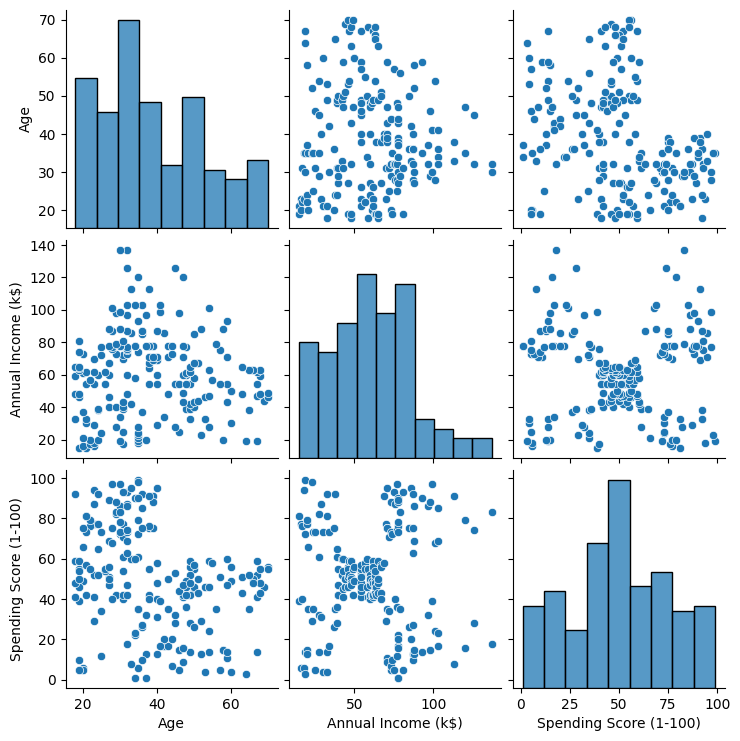

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Data Cleaning and Standardization

In [8]:
df_cleaned = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

In [10]:
from sklearn.cluster import KMeans

# Initialize KMeans with an arbitrary number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model and predict cluster labels
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Check the first few rows with cluster labels
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        2
3   23                  16                      77        2
4   31                  17                      40        2


C:\Users\vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


##### Gender is not used to fit Kmeans as Kmeans depends on Euclidean distance which can be measured well in case of continuous variables and not in case of binary variables such as encoded gender variable.

#### Elbow curve for optimal k

C:\Users\vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Wi

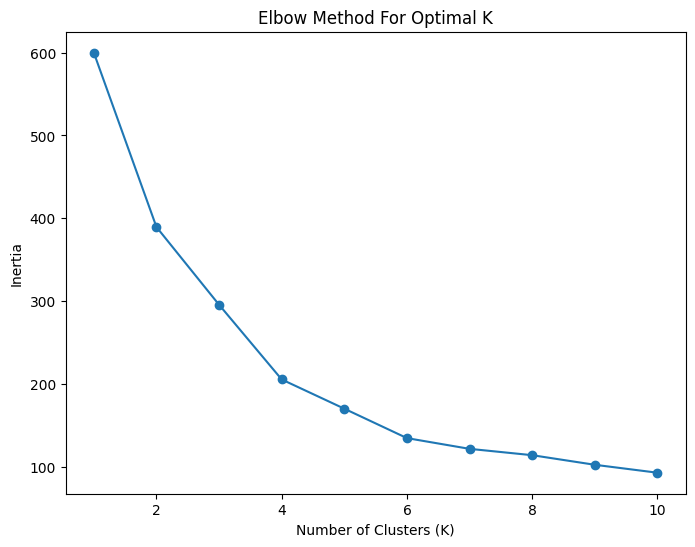

In [11]:
inertia = []
K_range = range(1, 11)  # Try K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#### Plotting clusters with k=4 using Age and Annual Income

C:\Users\vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


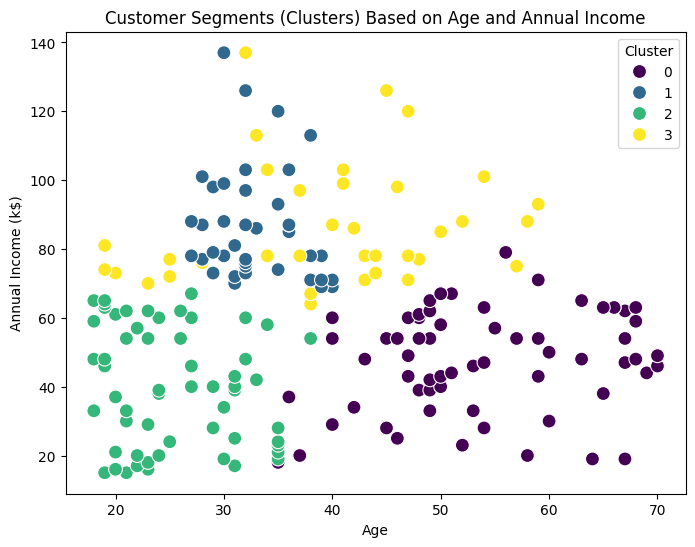

In [27]:
# Fit KMeans with the optimal K (e.g., K=3)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters using 'age' and 'annual income'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments (Clusters) Based on Age and Annual Income')
plt.show()

#### Silhouette score for finding out how well clusters are defined

In [28]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for the clustering
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.4039582785148566


#### Plotting clusters with PCA

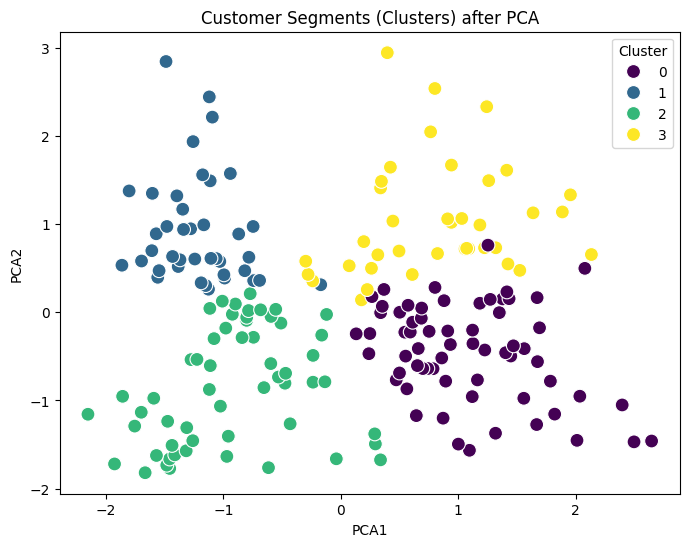

In [24]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a new DataFrame with the PCA-reduced data and cluster labels
df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_df['Cluster'] = df['Cluster']

# Visualize clusters in PCA-reduced space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca_df, palette='viridis', s=100)
plt.title('Customer Segments (Clusters) after PCA')
plt.show()